In [194]:
import pandas as pd

In [195]:
#pip install git+https://github.com/quantopian/pyfolio
# import again if first time not work
import pyfolio

In [196]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline

In [197]:
def get_daily_return(df):
    df['daily_return']=df.account_value.pct_change(1)
    #df=df.dropna()
    print('Sharpe: ',(252**0.5)*df['daily_return'].mean()/ df['daily_return'].std())
    return df

In [220]:
def backtest_strat(df):
    strategy_ret= df.copy()
    strategy_ret['datadate'] = pd.to_datetime(strategy_ret['datadate'])
    strategy_ret.set_index('datadate', drop = False, inplace = True)
    strategy_ret.index = strategy_ret.index.tz_localize('UTC')
    del strategy_ret['datadate']
    ts = pd.Series(strategy_ret['daily_return'].values, index=strategy_ret.index)
    return ts

In [199]:
def get_account_value(model_name):
    df_account_value=pd.DataFrame()
    for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
        temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format(model_name,i))
        df_account_value = df_account_value.append(temp,ignore_index=True)
    df_account_value = pd.DataFrame({'account_value':df_account_value['0']})
    sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
    print(sharpe)
    df_account_value=df_account_value.join(df_trade_date[63:].reset_index(drop=True))
    return df_account_value

In [200]:
## I888

In [215]:
I888 = pd.read_csv("rawData/I888_day.csv")
test = I888[(I888['datadate']>='2017-12-06') & (I888['datadate']<='2019-03-25')]
test = test.reset_index(drop=True)

In [216]:
test.shape

(315, 8)

In [217]:
test.head()

,Unnamed: 0,high,low,open,close,volume,tic,datadate
0,130,550.0,527.0,546.0,529.0,2761820.0,I888,2017-12-06
1,131,530.5,498.0,529.5,500.5,3266458.0,I888,2017-12-07
2,132,514.5,496.0,502.0,512.5,2763314.0,I888,2017-12-08
3,133,526.0,501.0,512.0,501.5,3375408.0,I888,2017-12-11
4,134,520.5,501.0,504.0,509.0,3390808.0,I888,2017-12-12


In [218]:
test['daily_return']=test['close'].pct_change(1)

In [221]:
I888_strat = backtest_strat(test)

## Ensemble Strategy

In [202]:
I888_day=pd.read_csv('rawData/I888_day.csv')
test_I888_day=I888_day[(I888_day['datadate']>='2017-12-06') & (I888_day['datadate']<='2019-03-25')]
test_I888_day.index=range(len(test_I888_day))


In [203]:
df=pd.read_csv('done_data_IJRB.csv')

In [204]:
rebalance_window = 63
validation_window = 63
unique_trade_date = df[(df.datadate > 20170831)&(df.datadate <= 20190531)].datadate.unique()


In [205]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

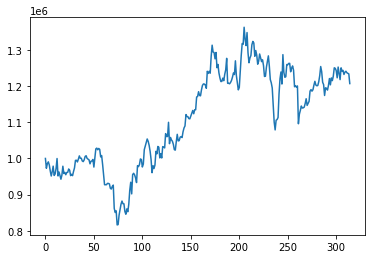

In [207]:
ensemble_account_value = get_account_value('ensemble')

In [208]:
ensemble_account_value.account_value.plot()

Sharpe:  0.6471477467670883


In [209]:
ensemble_account_value = get_daily_return(ensemble_account_value)

In [210]:
ensemble_account_value['Date'] = test_I888_day['datadate']

     account_value  datadate  daily_return        Date
0     1.000000e+06  20171206           NaN  2017-12-06
1     9.729048e+05  20171207     -0.027095  2017-12-07
2     9.858363e+05  20171208      0.013292  2017-12-08
3     9.906194e+05  20171211      0.004852  2017-12-11
4     9.819129e+05  20171212     -0.008789  2017-12-12
..             ...       ...           ...         ...
310   1.241220e+06  20190319      0.002015  2019-03-19
311   1.237169e+06  20190320     -0.003264  2019-03-20
312   1.235398e+06  20190321     -0.001432  2019-03-21
313   1.234009e+06  20190322     -0.001124  2019-03-22
314   1.207103e+06  20190325     -0.021804  2019-03-25

[315 rows x 4 columns]


In [ ]:
print(ensemble_account_value)

In [206]:
ensemble_strat = backtest_strat(ensemble_account_value[0:315])

0.6471477467670883


In [ ]:
#ensemble_account_value.to_csv('results/df_account_value_ensemble_daily_return.csv',index=False)

Start date,2017-12-06
End date,2019-03-25
Total months,15
,Backtest
Annual return,16.251%
Cumulative returns,20.71%
Annual volatility,30.578%
Sharpe ratio,0.65
Calmar ratio,0.78
Stability,0.66
Max drawdown,-20.835%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,20.83,2018-10-12,2018-11-27,NaT,NaN
1,20.65,2018-02-27,2018-03-28,2018-05-14,55
2,9.40,2018-08-20,2018-09-27,2018-10-10,38
3,8.85,2018-05-16,2018-05-23,2018-06-12,20
4,6.98,2018-06-15,2018-06-27,2018-07-12,20


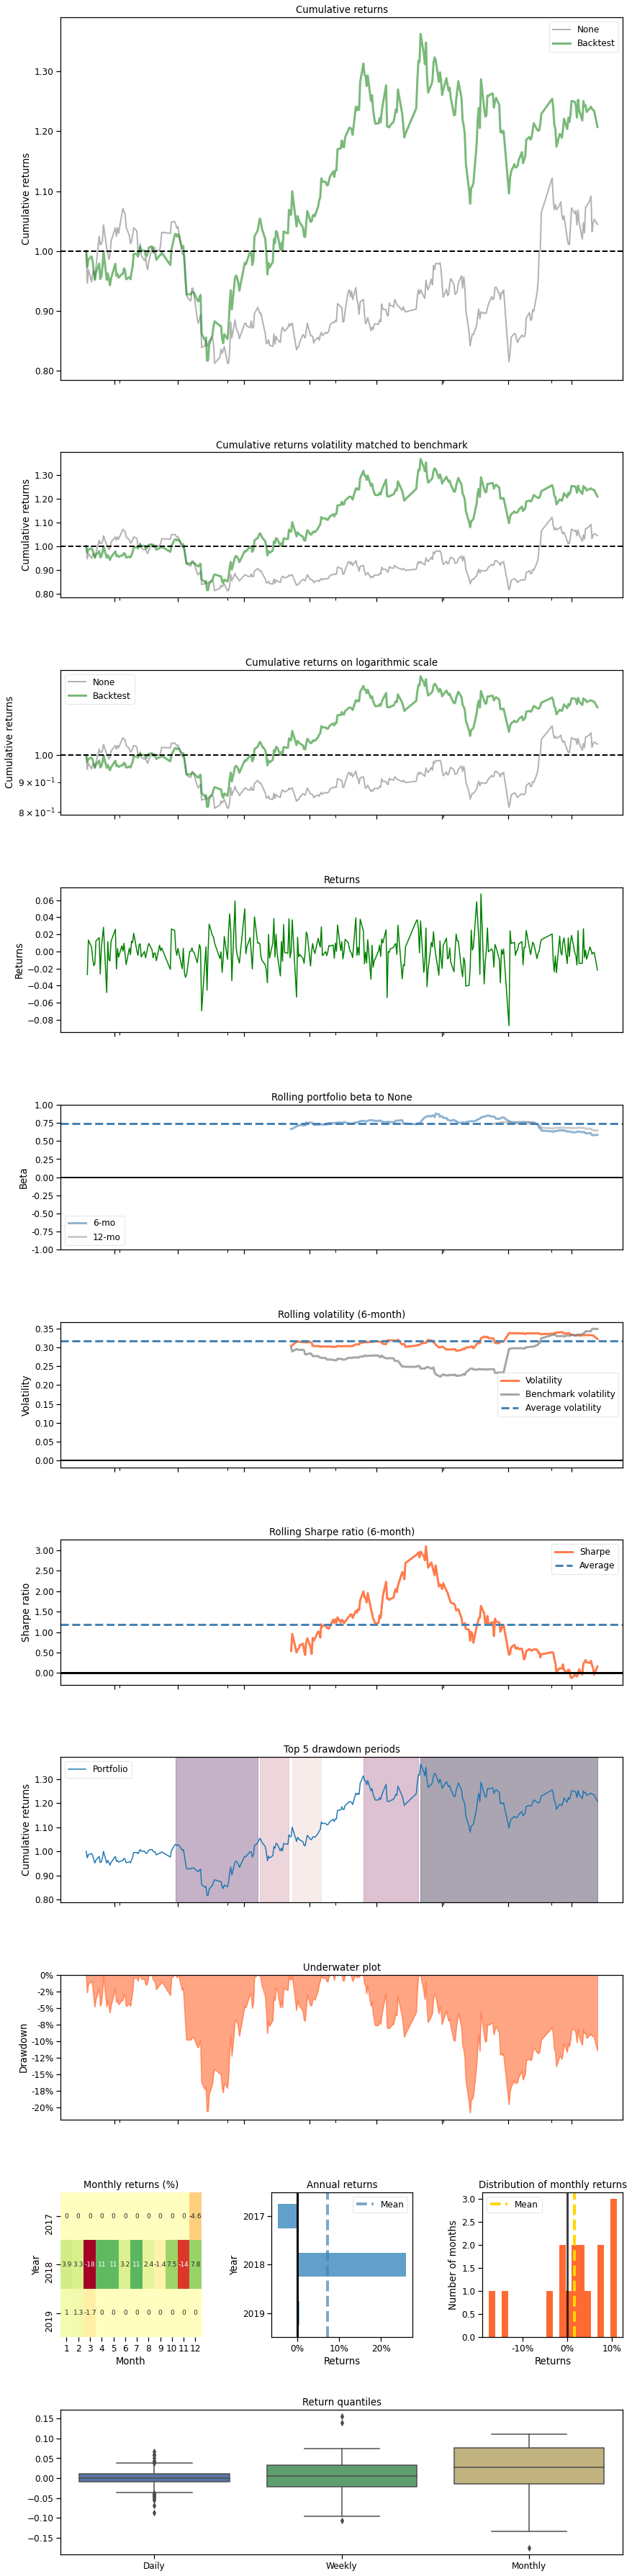

In [222]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = ensemble_strat,
                                   benchmark_rets=I888_strat,set_context=False)